In [11]:
import pandas as pd
import numpy as np
import tweepy
import requests as rq
import json
from yelp.client import Client
from tweepy.parsers import JSONParser
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "GlqIgLmPEfS2LBHkBGGqLRbCv"
consumer_secret = "lIdwBTOYOeSNbvZm2c43Ibm4ARtwSS5pQCfl5MdSpo2S7c2mc6"
access_token = "942094170847526912-kAVi1LeM2T6pqwFNbkCERuDxmgJuH3M"
access_token_secret = "4skwxhl5QUwDsgJDVSm4ynuf6DM8HLQmhhQtVXUP1PWWG"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=JSONParser())

target_cities = ["Chicago",
                 "New York",
                 "Houston",
                 "Philadelphia",
                 "Los Angeles",
                 "Atlanta",
                 "Miami"]

sentiment_df = pd.read_csv("LA-restaurant.csv")

coordinates = []

for city in target_cities:
    for index,row in sentiment_df.iterrows():
        location = geolocator.geocode(city)
        public_tweets = api.search(row["User Name"],
                                   rpp=100,
                                   result_type="recent",
                                   geocode =('%s,%s,20mi' %(location.latitude, 
                                                   location.longitude)))
        for tweet in public_tweets["statuses"]:
            
            compound_sen = analyzer.polarity_scores(tweet["text"])["compound"]
        
        
            coordinates.append({"Latitude": location.latitude,
                                "Longitude": location.longitude,
                                "Geo Format" : '%s,%s,20mi' %(location.latitude, 
                                                              location.longitude),
                                "City": city,
                                "Restaurant" : row["User Name"],
                                "Compound Sentiment" : compound_sen})
                      
coordinates_df = pd.DataFrame.from_dict(coordinates)

            

GeocoderTimedOut: Service timed out

In [6]:
coordinates_df

,City,Compound Sentiment,Geo Format,Latitude,Longitude,Restaurant
0,Chicago,0.8745,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
1,Chicago,0.7256,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
2,Chicago,0.8478,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
3,Chicago,0.7706,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
4,Chicago,0.0000,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
5,Chicago,0.0000,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
6,Chicago,0.0000,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
7,Chicago,0.0000,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
8,Chicago,-0.5423,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
9,Chicago,0.0000,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster


In [8]:
heatmap_df = coordinates_df.loc[coordinates_df["Compound Sentiment"] != 0]
heatmap_df

,City,Compound Sentiment,Geo Format,Latitude,Longitude,Restaurant
0,Chicago,0.8745,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
1,Chicago,0.7256,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
2,Chicago,0.8478,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
3,Chicago,0.7706,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
8,Chicago,-0.5423,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
11,Chicago,0.5777,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
12,Chicago,0.5080,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
13,Chicago,0.7506,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
14,Chicago,-0.2960,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,redlobster
15,Chicago,0.5473,"41.8755546,-87.6244212,20mi",41.875555,-87.624421,innoutburger


In [9]:
heatmap_df = heatmap_df.groupby(["City", "Restaurant"]).mean()
heatmap_df = heatmap_df.reset_index()
heatmap_df

,City,Restaurant,Compound Sentiment,Latitude,Longitude
0,Chicago,innoutburger,0.237460,41.875555,-87.624421
1,Chicago,redlobster,0.468500,41.875555,-87.624421
2,Houston,innoutburger,0.307100,29.758938,-95.367697
3,Houston,redlobster,-0.039800,29.758938,-95.367697
4,New York,innoutburger,0.021517,40.730646,-73.986614
5,New York,redlobster,0.736400,40.730646,-73.986614


In [10]:
heatmap_df = heatmap_df.pivot("City", "Restaurant", "Compound Sentiment")
heatmap_df

Restaurant,innoutburger,redlobster
City,,
Chicago,0.237460,0.4685
Houston,0.307100,-0.0398
New York,0.021517,0.7364


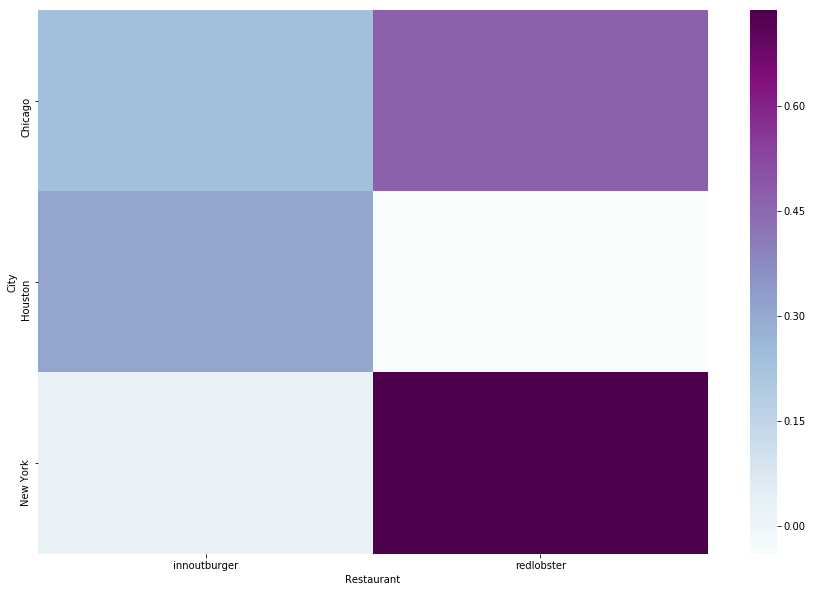

In [11]:
plt.figure(figsize = (15,10))

sns.heatmap(heatmap_df, cmap="BuYlGn", center=0)

plt.savefig("HeatMap Visualization on Sentiments of City Restaurants.png")
plt.show()